# Introduction

A short analysis of the Android app market by comparing apps in the Google Play store.

**Data Source:**
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed at [Kaggle](
https://www.kaggle.com/lava18/google-play-store-apps).


In [1]:
import pandas as pd
import plotly.express as px
import numpy as np

# show numeric output in decimal format
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('googleplaystore.csv')

# Data Cleaning

In [3]:
# first, get an overview

df.shape

(10841, 13)

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0+,Paid,$2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up
8631,PDF Reader - Scan、Edit & Share,BUSINESS,4.30,54520,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 30, 2018",3.12.4,Varies with device
9534,Sabka Malik Ek Sai,SOCIAL,4.20,17,5.1M,"1,000+",Free,0,Teen,Social,"May 25, 2013",1.3,2.2 and up
3803,CBS News,NEWS_AND_MAGAZINES,4.30,23641,23M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"June 29, 2018",3.9.0,4.1 and up
7665,"Chinese Chess 3D Online (Xiangqi, 象棋, co tuong)",GAME,3.50,23,37M,"1,000+",Paid,$0.99,Everyone,Board,"December 27, 2017",2.2.1,4.1 and up


### Drop Columns noit needed

In [6]:
df.drop(['Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


### Find and Remove NaN values in Ratings

In [7]:
nan_values = df[df.Rating.isna()]
print(nan_values.shape)
nan_values.head()

(1474, 10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty


In [8]:
df_cleaned = df.dropna()
df_cleaned.shape

(9366, 10)

### Find and Remove Duplicates

In [9]:
# let's have a look at e.g. Instagram
df_cleaned[df_cleaned.App == 'Instagram']
# multiple entries for one app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2545,Instagram,SOCIAL,4.50,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social
2604,Instagram,SOCIAL,4.50,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social
2611,Instagram,SOCIAL,4.50,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social
3909,Instagram,SOCIAL,4.50,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social


In [10]:
# find duplicate values

duplicat_values = df_cleaned[df_cleaned.duplicated()]
print(duplicat_values.shape)
duplicat_values.head()

(476, 10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.20,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business
236,Box,BUSINESS,4.20,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business
239,Google My Business,BUSINESS,4.40,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business
256,ZOOM Cloud Meetings,BUSINESS,4.40,31614,37M,"10,000,000+",Free,0,Everyone,Business
261,join.me - Simple Meetings,BUSINESS,4.00,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business


In [11]:
# drop duplicates

df_cleaned = df_cleaned.drop_duplicates()

In [12]:
# check Instagram again

df_cleaned[df_cleaned.App == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2545,Instagram,SOCIAL,4.50,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social
2604,Instagram,SOCIAL,4.50,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social
3909,Instagram,SOCIAL,4.50,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social


In [13]:
# specify which columns to consider for indentifying duplicates (we don't care for the reviews currently)
df_cleaned = df_cleaned.drop_duplicates(subset=['App', 'Type', 'Price'])

# check Instagram again
df_cleaned[df_cleaned.App == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2545,Instagram,SOCIAL,4.50,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social


In [14]:
df_cleaned.shape

(8198, 10)

# Find Highest Rated Apps

In [15]:
# sort by Rating and show top values

df_cleaned.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
8327,The Divine Feminine App: the DF App,LIFESTYLE,5.00,8,6.7M,"1,000+",Free,0,Everyone,Lifestyle
5507,Accounting Quiz (AQ) Malaysia,FAMILY,5.00,25,Varies with device,"1,000+",Free,0,Everyone,Education
9194,UP EB Bill Payment & Details,SOCIAL,5.00,3,2.4M,50+,Free,0,Teen,Social
9218,EB Cash Collections,BUSINESS,5.00,1,4.3M,5+,Free,0,Everyone,Business
7270,CF Townsville,HEALTH_AND_FITNESS,5.00,4,14M,100+,Free,0,Everyone,Health & Fitness


# Find 5 Largest Apps by Size

In [16]:
# remove 'Varies with device'
df_largest = df_cleaned[df_cleaned.Size != 'Varies with device']

# check if there are only MB and KB
df_largest['Size'].str[-1].value_counts()
# only M or k, so convert everything to KB; first remove the letter at the end and convert to numeric
df_largest['NewSize'] = np.where(df_largest['Size'].str[-1] == 'M', pd.to_numeric(df_largest['Size'].str[:-1]).apply(lambda x: x*1000), pd.to_numeric(df_largest['Size'].str[:-1]))


## the red flag is the SettingWithCopyWarning and was created to flag potentially confusing "chained" assignments, such as the following
## for this purpose still ok

C:\Users\benja\AppData\Local\Temp/ipykernel_13516/1625942685.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_largest['NewSize'] = np.where(df_largest['Size'].str[-1] == 'M', pd.to_numeric(df_largest['Size'].str[:-1]).apply(lambda x: x*1000), pd.to_numeric(df_largest['Size'].str[:-1]))


In [17]:
# sample and see if everything is ok
df_largest.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,NewSize
4859,Angry Birds Evolution,FAMILY,4.50,384602,88M,"10,000,000+",Free,0,Everyone,Role Playing,"88,000.00"
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.00,10,3.0M,"10,000+",Free,0,Everyone,Entertainment,"3,000.00"
7696,Foothills CP,FAMILY,5.00,4,7.8M,100+,Free,0,Teen,Education,"7,800.00"
5438,3D Tennis,SPORTS,4.20,1008012,13M,"50,000,000+",Free,0,Everyone,Sports,"13,000.00"
5235,AJ Official,FAMILY,4.60,31,7.3M,500+,Free,0,Everyone,Education,"7,300.00"
3426,Pink Roses Live Wallpaper,PERSONALIZATION,4.20,33074,3.3M,"1,000,000+",Free,0,Everyone,Personalization,"3,300.00"
4751,Lock Screen Phone X Style OS 11,TOOLS,4.40,1166,13M,"100,000+",Free,0,Everyone,Tools,"13,000.00"
598,Dating Network,DATING,4.00,187,19M,"10,000+",Free,0,Mature 17+,Dating,"19,000.00"
10711,4x4 Jeep Racer,GAME,4.10,7279,54M,"1,000,000+",Free,0,Everyone,Racing,"54,000.00"
6484,BM Physiotherapy Clinic,HEALTH_AND_FITNESS,5.00,3,9.3M,100+,Free,0,Everyone,Health & Fitness,"9,300.00"


In [18]:
# sort by 'new' size
df_largest.sort_values('NewSize', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,NewSize
7404,SimCity BuildIt,FAMILY,4.50,4218587,100M,"50,000,000+",Free,0,Everyone 10+,Simulation,"100,000.00"
5427,Ultimate Tennis,SPORTS,4.30,183004,100M,"10,000,000+",Free,0,Everyone,Sports,"100,000.00"
2299,Navi Radiography Pro,MEDICAL,4.70,11,100M,500+,Paid,$15.99,Everyone,Medical,"100,000.00"
5530,The Walking Dead: Our World,GAME,4.00,22435,100M,"1,000,000+",Free,0,Teen,Action,"100,000.00"
1080,Post Bank,FINANCE,4.50,60449,100M,"1,000,000+",Free,0,Everyone,Finance,"100,000.00"


# Find the 5 App with Most Reviews

In [19]:
# df_cleaned.dtypes shows that reviews are not numerical
df_cleaned.Reviews = pd.to_numeric(df_cleaned.Reviews)

df_cleaned.sort_values('Reviews', ascending=False).head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2544,Facebook,SOCIAL,4.10,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social
336,WhatsApp Messenger,COMMUNICATION,4.40,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication
2545,Instagram,SOCIAL,4.50,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication
1670,Clash of Clans,GAME,4.60,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy
...,...,...,...,...,...,...,...,...,...,...
1790,Castle Clash: Heroes of the Empire US,GAME,4.60,4578476,24M,"50,000,000+",Free,0,Everyone 10+,Strategy
1360,Period Tracker - Period Calendar Ovulation Tra...,HEALTH_AND_FITNESS,4.80,4559407,Varies with device,"100,000,000+",Free,0,Everyone,Health & Fitness
3967,Pixel Gun 3D: Survival shooter & Battle Royale,GAME,4.50,4487182,55M,"50,000,000+",Free,0,Teen,Action
6578,Township,FAMILY,4.60,4451317,Varies with device,"50,000,000+",Free,0,Everyone,Casual


# Visualise Categorical Data: Content Ratings
Use Plotly Pie and Donut Charts to visualise data

In [20]:
# count entries by rating
ratings = df_cleaned['Content Rating'].value_counts()
ratings

Everyone           6620
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

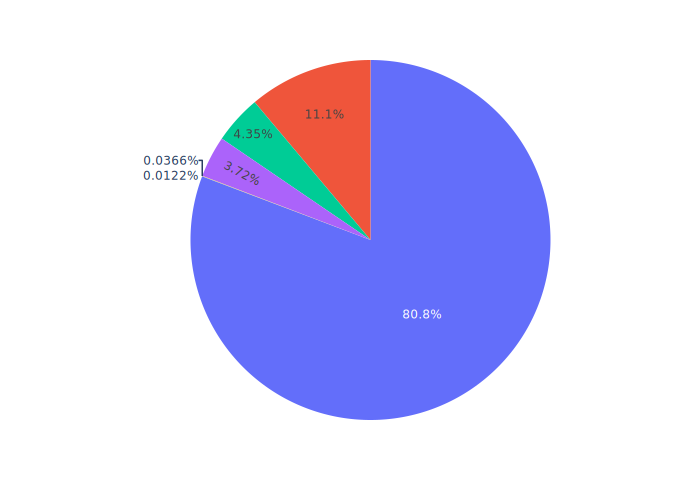

In [21]:
fig = px.pie(labels=ratings.index, values=ratings.values)

fig.show("svg", engine="kaleido") # as png to have static output for github; kaleido library necessary

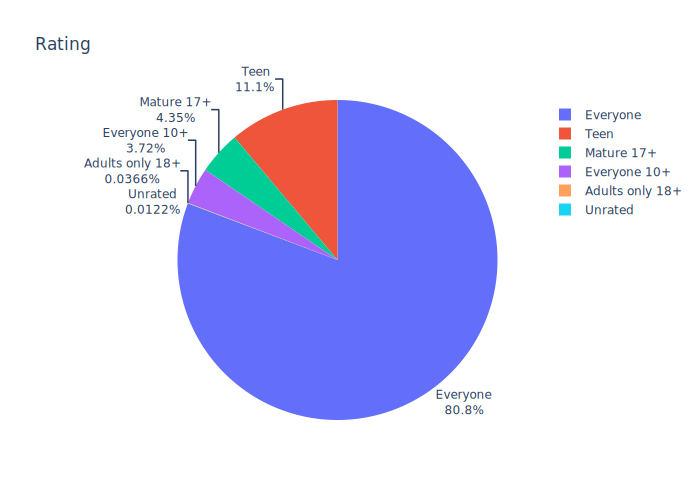

In [22]:
fig = px.pie(labels=ratings.index, 
             values=ratings.values,
             title="Rating",
             names=ratings.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show("svg", engine="kaleido") # as png to have static output for github; kaleido library necessary

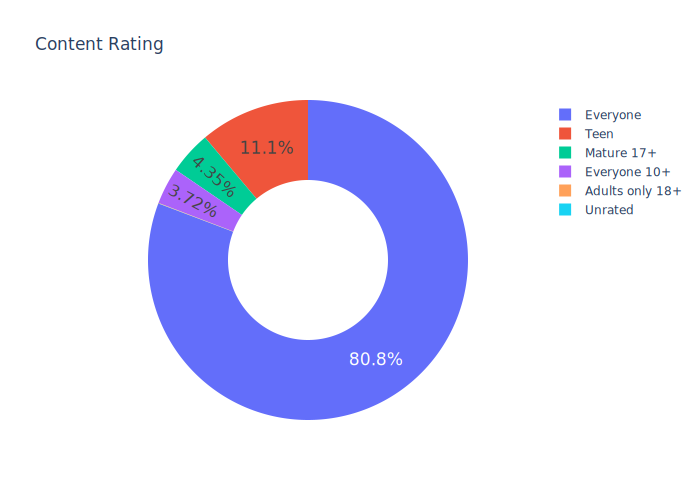

In [23]:
fig = px.pie(labels=ratings.index, 
             values=ratings.values,
             title="Content Rating",
             names=ratings.index,
             hole=0.5, # to have a donut shape
)
fig.update_traces(textposition='inside', textfont_size=17, textinfo='percent')

fig.show("svg", engine="kaleido") # as png to have static output for github; kaleido library necessary

# Examine the Number of Installs

In [24]:
df_cleaned.Installs.describe()

count           8198
unique            19
top       1,000,000+
freq            1415
Name: Installs, dtype: object

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8198 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8198 non-null   object 
 1   Category        8198 non-null   object 
 2   Rating          8198 non-null   float64
 3   Reviews         8198 non-null   int64  
 4   Size            8198 non-null   object 
 5   Installs        8198 non-null   object 
 6   Type            8198 non-null   object 
 7   Price           8198 non-null   object 
 8   Content Rating  8198 non-null   object 
 9   Genres          8198 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 704.5+ KB


In [26]:
# installs are type objects, due to the special characters (comma & +)
# need to be changed to numerical data

df_cleaned[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1+,3
"1,000+",697
"1,000,000+",1415
"1,000,000,000+",20
10+,69
"10,000+",987
"10,000,000+",937
100+,303
"100,000+",1095


In [27]:
df_cleaned.Installs = df_cleaned.Installs.astype(str).str.replace(',', "")
df_cleaned.Installs = df_cleaned.Installs.astype(str).str.replace('+', "")

df_cleaned.Installs = pd.to_numeric(df_cleaned.Installs)

df_cleaned[['App', 'Installs']].groupby('Installs').count()

C:\Users\benja\AppData\Local\Temp/ipykernel_13516/1881246972.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,697
5000,425
10000,987


# Find the Most Expensive Apps

Filter out noise
estimate a rough sales revenue

In [28]:
# same problem as for installs
df_cleaned.Price = df_cleaned.Price.astype(str).str.replace('$', "")
df_cleaned.Price = pd.to_numeric(df_cleaned.Price)

df_cleaned.sort_values('Price', ascending=False).head(20)

C:\Users\benja\AppData\Local\Temp/ipykernel_13516/3830313894.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4367,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle
5358,I am Rich!,FINANCE,3.80,93,22M,1000,Paid,399.99,Everyone,Finance
5356,I Am Rich Premium,FINANCE,4.10,1867,4.7M,50000,Paid,399.99,Everyone,Finance
4362,💎 I'm rich,LIFESTYLE,3.80,718,26M,10000,Paid,399.99,Everyone,Lifestyle
5373,I AM RICH PRO PLUS,FINANCE,4.00,36,41M,1000,Paid,399.99,Everyone,Finance
5369,I am Rich,FINANCE,4.30,180,3.8M,5000,Paid,399.99,Everyone,Finance
5364,I am rich (Most expensive app),FINANCE,4.10,129,2.7M,1000,Paid,399.99,Teen,Finance
5362,I Am Rich Pro,FAMILY,4.40,201,2.7M,5000,Paid,399.99,Everyone,Entertainment
5359,I am rich(premium),FINANCE,3.50,472,965k,5000,Paid,399.99,Everyone,Finance
5354,I am Rich Plus,FAMILY,4.00,856,8.7M,10000,Paid,399.99,Everyone,Entertainment


### The most expensive apps (< 250)

In [29]:
df_cleaned = df_cleaned[df_cleaned['Price'] < 250]
df_cleaned.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2253,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32M,1000,Paid,79.99,Everyone,Medical
2414,LTC AS Legal,MEDICAL,4.00,6,1.3M,100,Paid,39.99,Everyone,Medical
5360,I am Rich Person,LIFESTYLE,4.20,134,1.8M,1000,Paid,37.99,Everyone,Lifestyle
2301,A Manual of Acupuncture,MEDICAL,3.50,214,68M,1000,Paid,33.99,Everyone,Medical
3039,Golfshot Plus: Golf GPS,SPORTS,4.10,3387,25M,50000,Paid,29.99,Everyone,Sports


### Highest Grossing Paid App

In [30]:
df_cleaned['Revenue_Estimate'] = df_cleaned.Installs.mul(df_cleaned.Price)
df_cleaned.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Revenue_Estimate
2241,Minecraft,FAMILY,4.50,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
4034,Hitman Sniper,GAME,4.60,408292,29M,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7417,Grand Theft Auto: San Andreas,GAME,4.40,348962,26M,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
2883,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48M,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
5578,Sleep as Android Unlock,LIFESTYLE,4.50,23966,872k,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
8804,DraStic DS Emulator,GAME,4.60,87766,12M,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
4133,Weather Live,WEATHER,4.50,76593,Varies with device,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
8860,Bloons TD 5,FAMILY,4.60,190086,94M,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
9941,Tasker,TOOLS,4.60,43045,Varies with device,1000000,Paid,2.99,Everyone,Tools,"2,990,000.00"
5631,Five Nights at Freddy's,GAME,4.60,100805,50M,1000000,Paid,2.99,Teen,Action,"2,990,000.00"


# Analysing App Categories

In [31]:
# count of unique different categories
df_cleaned.Category.nunique()

33

In [32]:
# count of apps per category
top10_category = df_cleaned.Category.value_counts()[:10]
top10_category

FAMILY             1604
GAME                912
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
FINANCE             296
LIFESTYLE           296
MEDICAL             291
PHOTOGRAPHY         263
BUSINESS            263
Name: Category, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

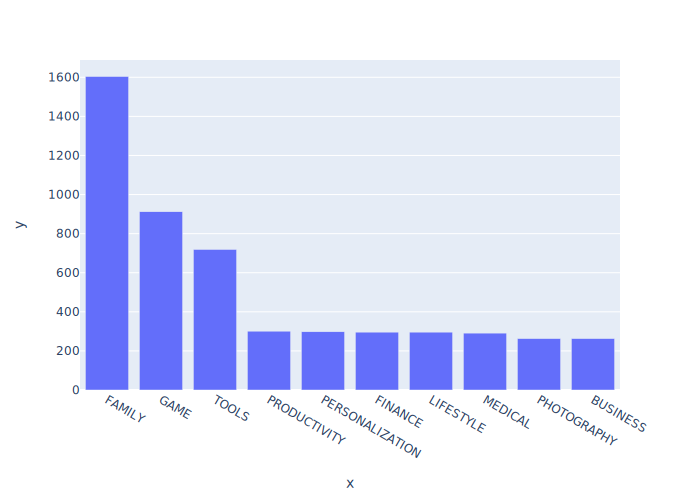

In [33]:
bar = px.bar(
        x = top10_category.index, # index = category name
        y = top10_category.values)

bar.show("svg", engine="kaleido") # as png to have static output for github; kaleido library necessary

### Most Popular Categories (Highest Downloads)

In [34]:
# group apps by category; sum of installations
installs_category = df_cleaned.groupby('Category').agg({'Installs': pd.Series.sum})
installs_category.sort_values('Installs', ascending=True, inplace=True)

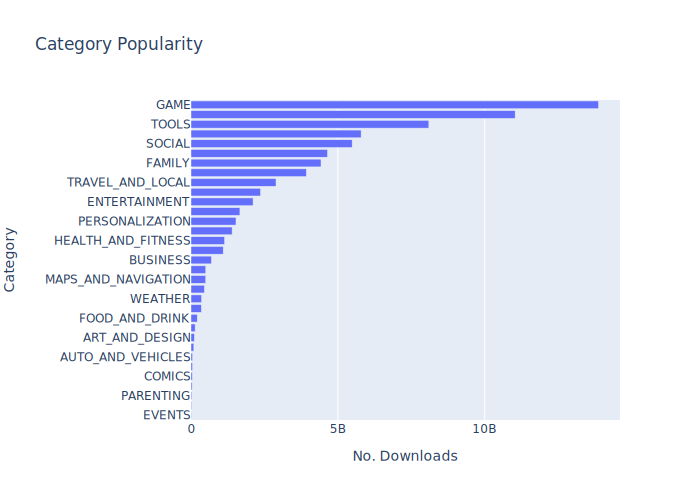

In [35]:
h_bar = px.bar(
        x = installs_category.Installs,
        y = installs_category.index,
        orientation='h',
        title='Category Popularity')

h_bar.update_layout(xaxis_title='No. Downloads', yaxis_title='Category')
h_bar.show("svg", engine="kaleido") # as png to have static output for github; kaleido library necessary

### Category Concentration - Downloads vs. Competition

In [36]:
# count number of apps by category
number_category = df_cleaned.groupby('Category').agg({'App': pd.Series.count})
merged_df = pd.merge(number_category, installs_category, on='Category', how="inner")

# get the dimension of the data
print(f'{merged_df.shape}')
merged_df.sort_values('Installs', ascending=False)

(33, 2)


,App,Installs
Category,,
GAME,912,13878762717
COMMUNICATION,256,11038241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5793070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1604,4427454490
VIDEO_PLAYERS,148,3926797200
TRAVEL_AND_LOCAL,187,2894859300


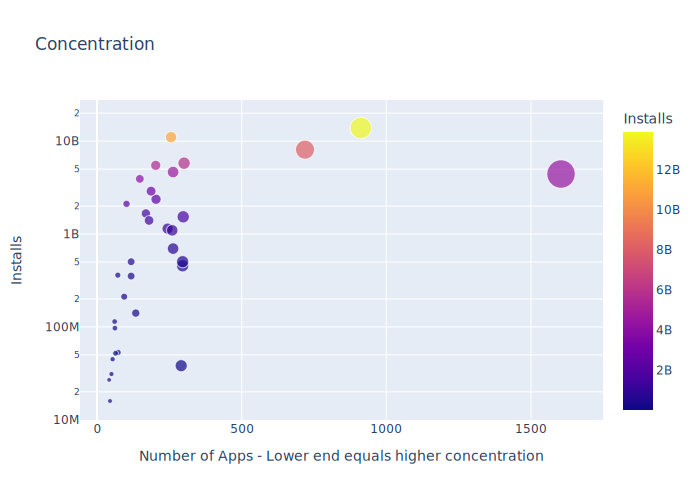

In [37]:
scatter = px.scatter(merged_df, # data
                     x='App', # column name
                     y='Installs',
                     title='Concentration',
                     size='App',
                     hover_name=merged_df.index,
                     color='Installs'
) 

scatter.update_layout(xaxis_title="Number of Apps - Lower end equals higher concentration",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))

scatter.show("svg", engine="kaleido") # as png to have static output for github; kaleido library necessary

# Extracting Nested Data from genre column

In [38]:
# no. Genres
len(df_cleaned.Genres.unique())

114

In [39]:
# need to clean multiple genres seperated by ;
df_cleaned.Genres.value_counts().sort_values(ascending=True)[:5]

Puzzle;Education              1
Art & Design;Pretend Play     1
Arcade;Pretend Play           1
Health & Fitness;Education    1
Adventure;Brain Games         1
Name: Genres, dtype: int64

In [40]:
# split the strings at the semi-colon & .stack
stack = df_cleaned.Genres.str.split(';', expand=True).stack()
print(f'Shape single column: {stack.shape}')
num_genres = stack.value_counts()
print(f'No. of genres: {len(num_genres)}')

Shape single column: (8562,)
No. of genres: 53


# Colour Scales in Plotly Charts - Competition in Genres

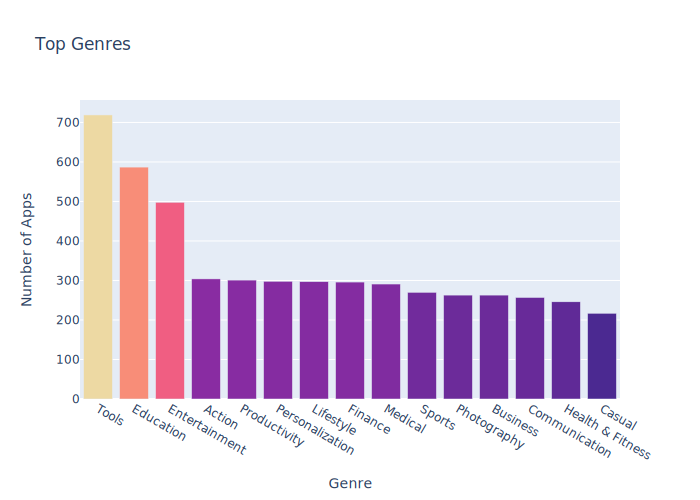

In [41]:
bar = px.bar(
        x = num_genres.index[:15], # index = category name
        y = num_genres.values[:15], # count
        title='Top Genres',
        hover_name=num_genres.index[:15],
        color=num_genres.values[:15],
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='Genre',
                  yaxis_title='Number of Apps',
                  coloraxis_showscale=False)

bar.show("svg", engine="kaleido") # as png to have static output for github; kaleido library necessary

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [42]:
df_cleaned.Type.value_counts()

Free    7594
Paid     589
Name: Type, dtype: int64

In [43]:
df_freepaid = df_cleaned.groupby(["Category", "Type"], 
                                      as_index=False).agg({'App': pd.Series.count})
df_freepaid.sort_values('App')

,Category,Type,App
3,AUTO_AND_VEHICLES,Paid,1
24,FOOD_AND_DRINK,Paid,2
38,NEWS_AND_MAGAZINES,Paid,2
40,PARENTING,Paid,2
17,ENTERTAINMENT,Paid,2
...,...,...,...
45,PRODUCTIVITY,Free,283
21,FINANCE,Free,289
53,TOOLS,Free,656
25,GAME,Free,836


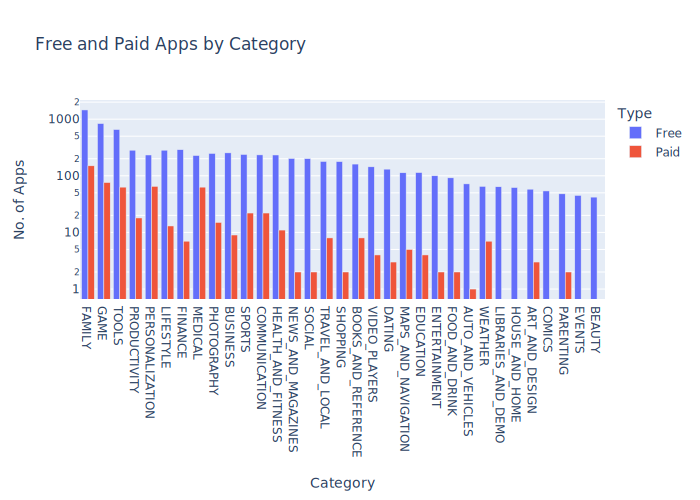

In [44]:
g_bar = px.bar(df_freepaid, 
               x='Category', 
               y='App',
               title='Free and Paid Apps by Category',
               color='Type', 
               barmode='group',)

g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='No. of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'),
                    )

g_bar.show("svg", engine="kaleido") # as png to have static output for github; kaleido library necessary

# Plotly Box Plots: "Lost" Downloads for Paid Apps

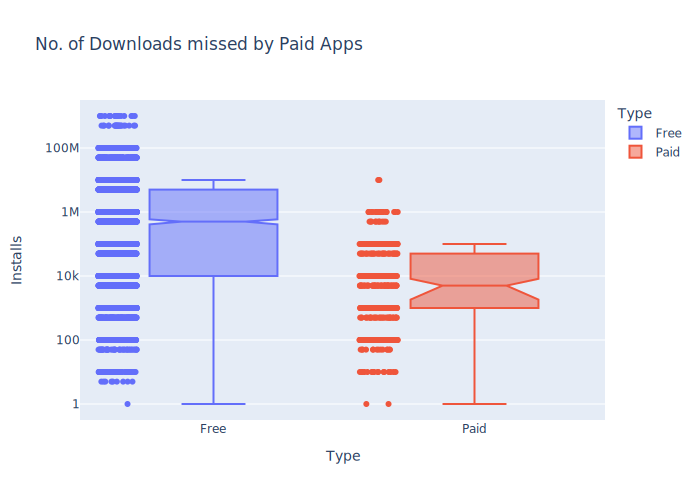

In [45]:
box = px.box(df_cleaned, 
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='No. of Downloads missed by Paid Apps'
)

box.update_layout(yaxis=dict(type='log'))

box.show("svg", engine="kaleido") # as png to have static output for github; kaleido library necessary


# Plotly Box Plots: Revenue by App Category

In [46]:
# filter out paid apps
df_paid = df_cleaned[df_cleaned['Type'] == 'Paid']

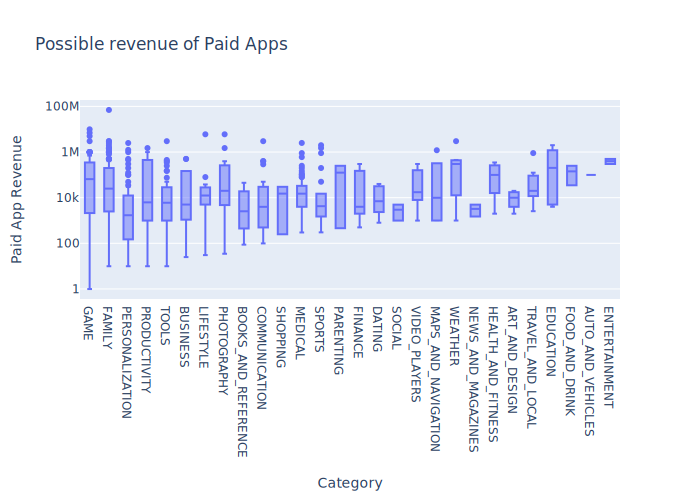

In [47]:
box = px.box(df_paid, 
             x='Category', 
             y='Revenue_Estimate',
             title='Possible revenue of Paid Apps')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))


box.show("svg", engine="kaleido") # as png to have static output for github; kaleido library necessary

# Paid App Pricing Strategies by Category

In [48]:
# median price for all paid apps

df_paid.Price.median()

2.99

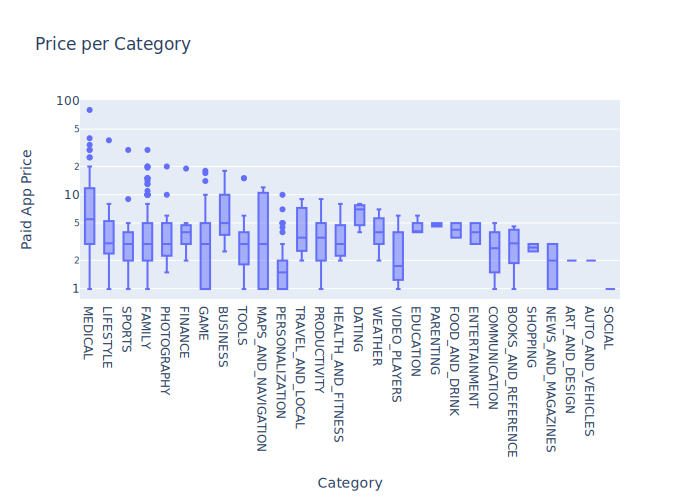

In [49]:
box = px.box(df_paid, 
             x='Category', 
             y="Price",
             title='Price per Category')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))


box.show("svg", engine="kaleido") # as png to have static output for github; kaleido library necessary